# **Ghori Zeel Jivrajbhai**

# **202201287**

**link of the colab file :** https://colab.research.google.com/drive/11Inoi1a_oRY8ljqPnWEtHYRjkFewqkXq?usp=sharing

**link of the dataset :** https://drive.google.com/file/d/136S1KvNBoEhxKu_A8J7cB3tliqm4z29M/view?usp=sharing

https://drive.google.com/file/d/1JeB8GlzHajQLCMV_9gs2f0GhLF5UyWdY/view?usp=sharing


# **Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Step 2: Load Data and Initial Analysis**

In [ ]:
#mount the gdrive
from google.colab import drive
drive.mount("/content/gdrive")

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/Loan_train.csv')

Mounted at /content/gdrive


In [ ]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
data.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
# Identify numerical and categorical columns
numeric_cols_names = data.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:")
print(numeric_cols_names)

# Get names of categorical columns
categorical_cols_names = data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols_names)

Numeric Columns:
['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']

Categorical Columns:
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
data.shape

(58645, 13)

In [ ]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
# Check for missing values
# Give the count of Null values for each column i.e., variables
data.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


# **Step 3: Data Visualization and Outlier Detection**

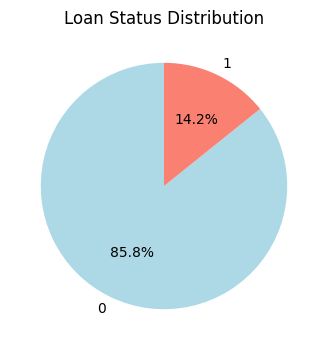

In [ ]:
# Visualize loan status distribution
# Loan status distribution
plt.figure(figsize=(6, 4))
data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Loan Status Distribution")
plt.ylabel('')
plt.show()

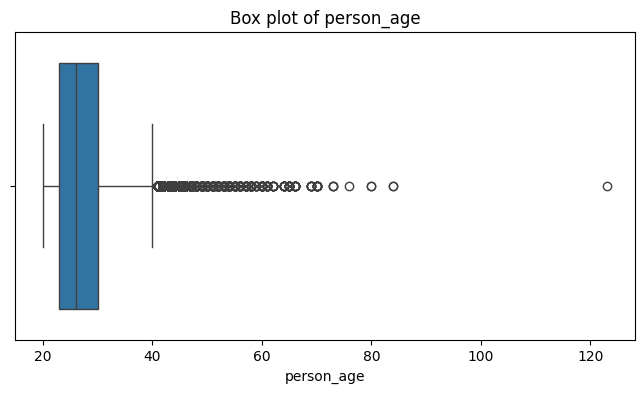

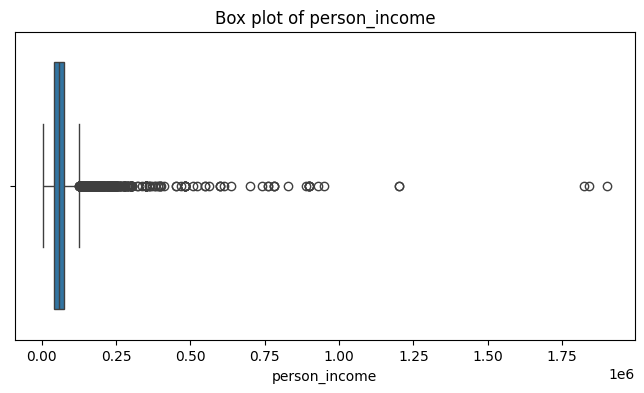

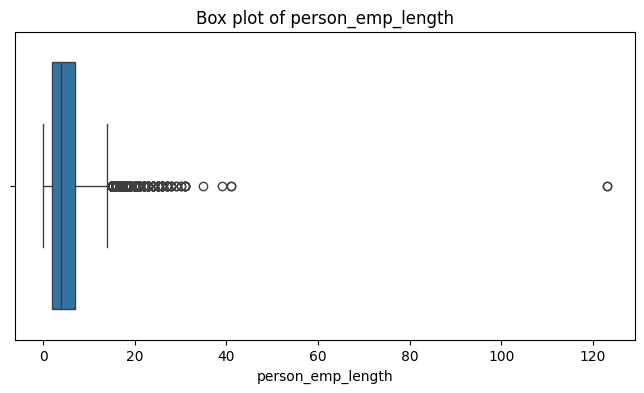

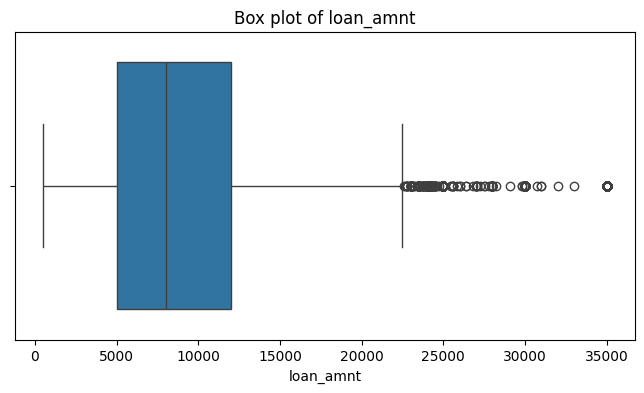

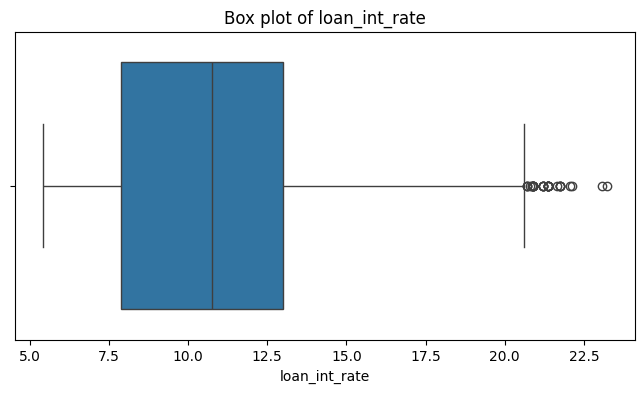

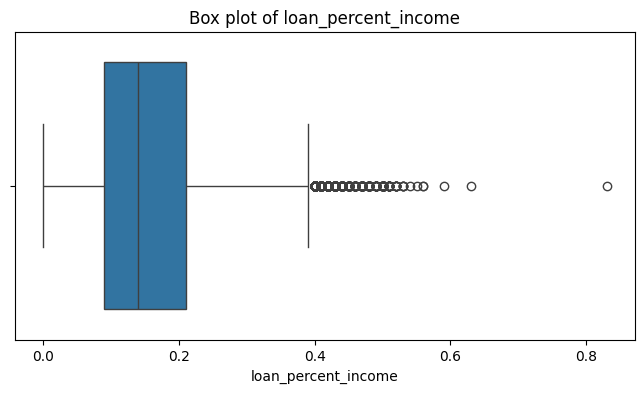

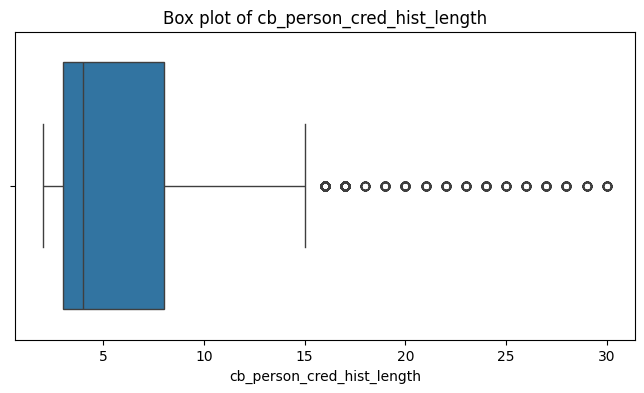

In [ ]:
# Box plot for numerical features to detect outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop(['loan_status', 'id'])
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [ ]:
print("Original DataFrame shape: ", data.shape[0],"x", data.shape[1])
print(data)
# Remove outliers using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print("\nCleaned DataFrame without outliers:b ", data.shape[0],"x", data.shape[1])
print(data)

Original DataFrame shape:  58645 x 13
          id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0   

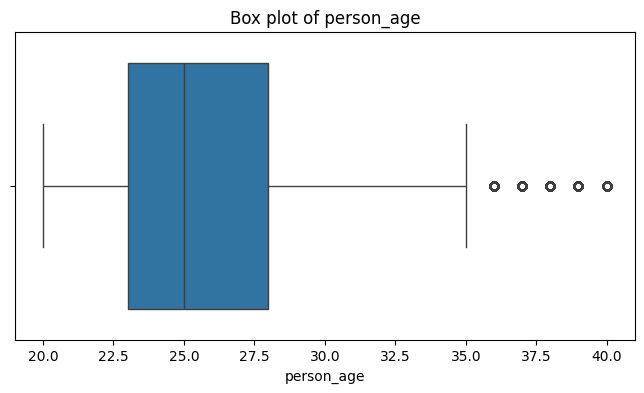

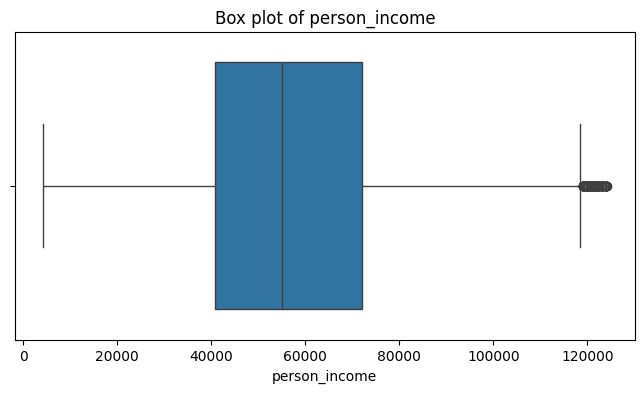

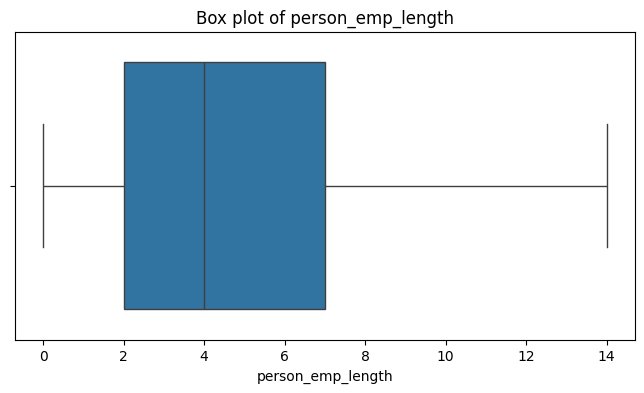

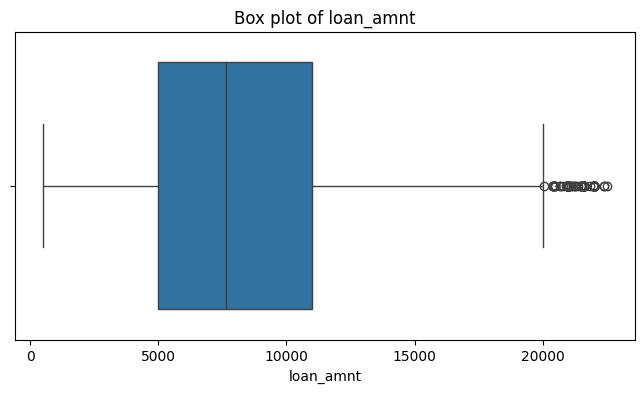

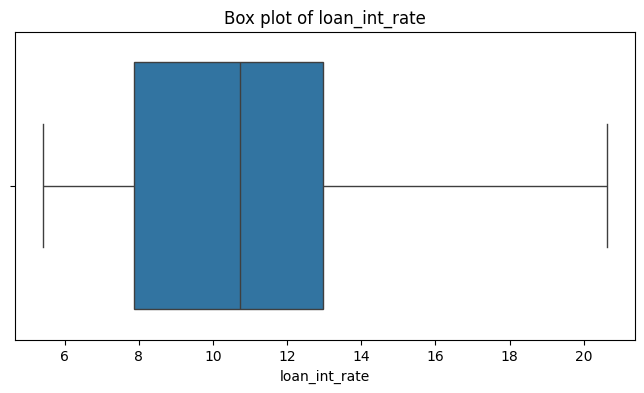

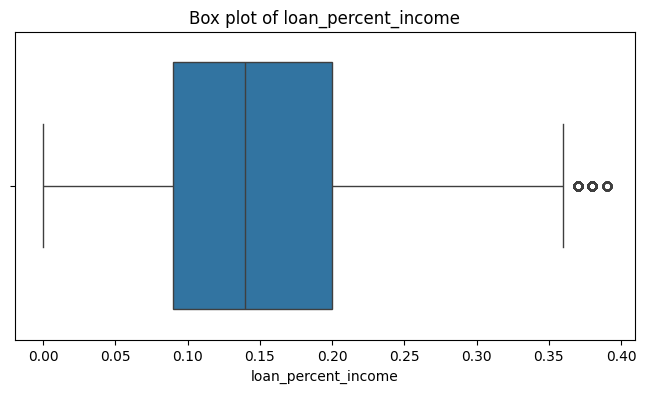

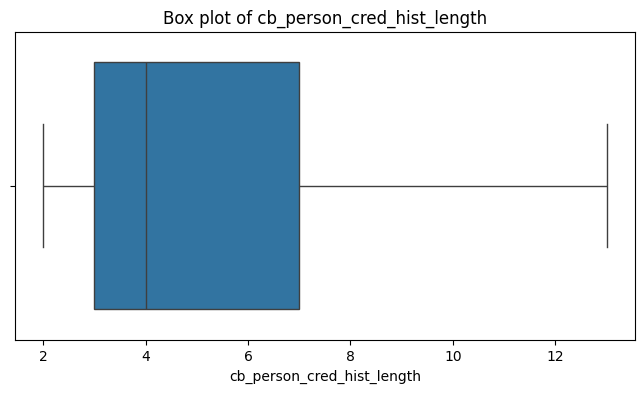

In [ ]:
# Box plot for numerical features to detect outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop(['loan_status', 'id'])
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


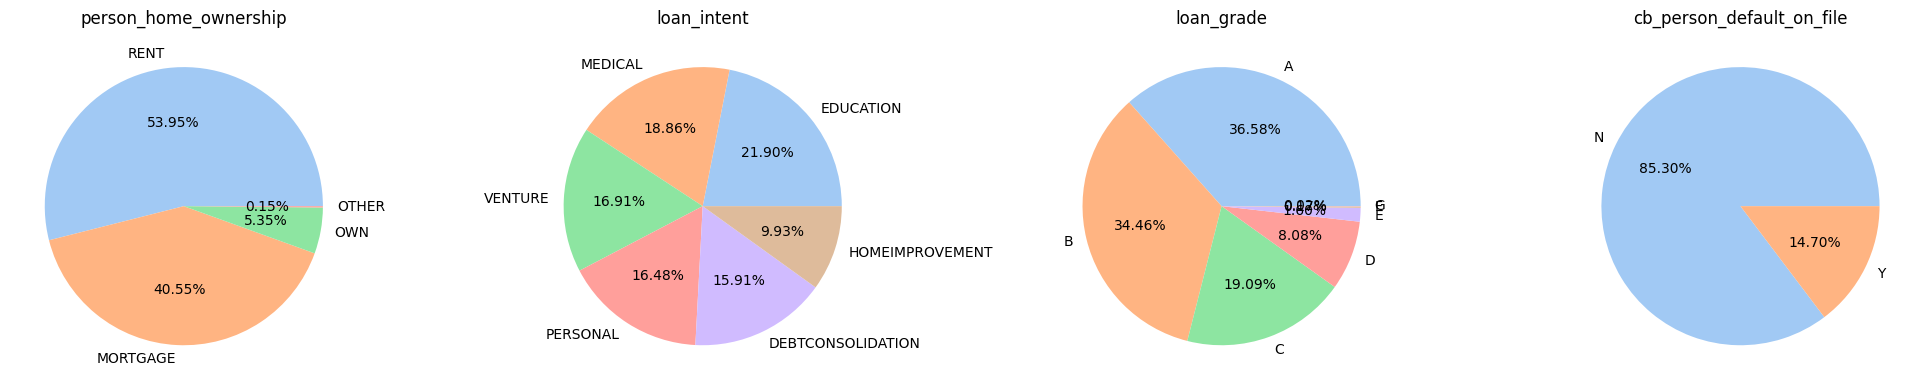

In [ ]:
# Create subplots for 4 categorical columns
fig, ax = plt.subplots(1, 4, figsize=(20, 4))  # Adjusted for 4 columns

# Plotting pie charts
for axid, col in enumerate(categorical_cols_names):
    col_dist = data[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind='pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[axid], ylabel='')  # Hide ylabel for clarity
    ax[axid].set_title(col)  # Set title for each subplot

plt.tight_layout()
plt.show()

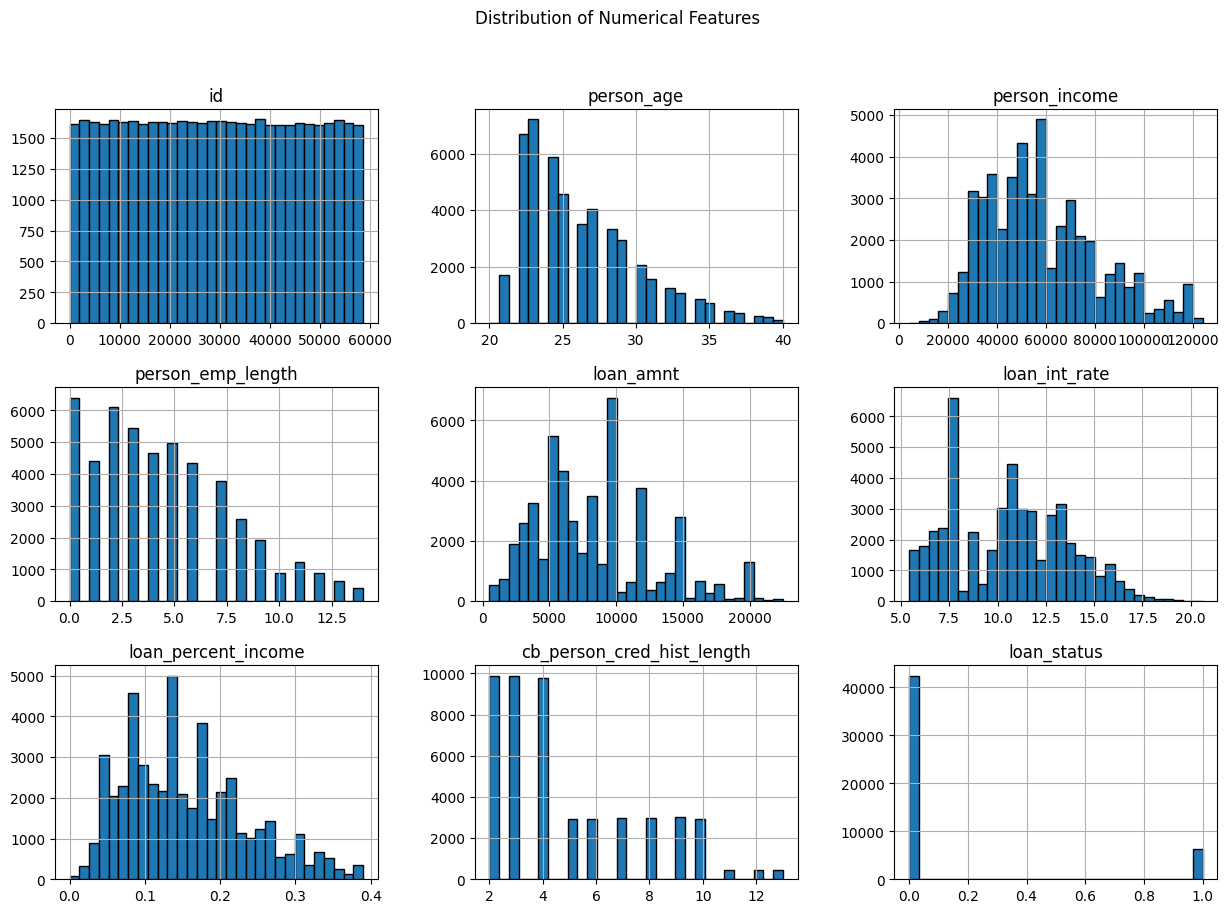

In [ ]:
# Distribution of numerical features
data[numeric_cols_names].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [ ]:
# Pair plots
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Step 4: Encoding Categorical Variables**

In [ ]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
data['cb_person_default_on_file'] = label_encoder.fit_transform(data['cb_person_default_on_file'])

# One-Hot Encoding for nominal categorical variables
# categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
# preprocessor = ColumnTransformer(
#     transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
#     remainder='passthrough'
# )

# One-Hot Encoding for nominal categorical variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# **Step 5: Feature Selection (Correlation Matrix & RFE)**

loan_status                   1.000000
loan_int_rate                 0.344195
loan_percent_income           0.302228
person_income                 0.208918
person_emp_length             0.107833
loan_amnt                     0.101633
cb_person_cred_hist_length    0.013908
id                            0.010616
person_age                    0.008931
Name: loan_status, dtype: float64


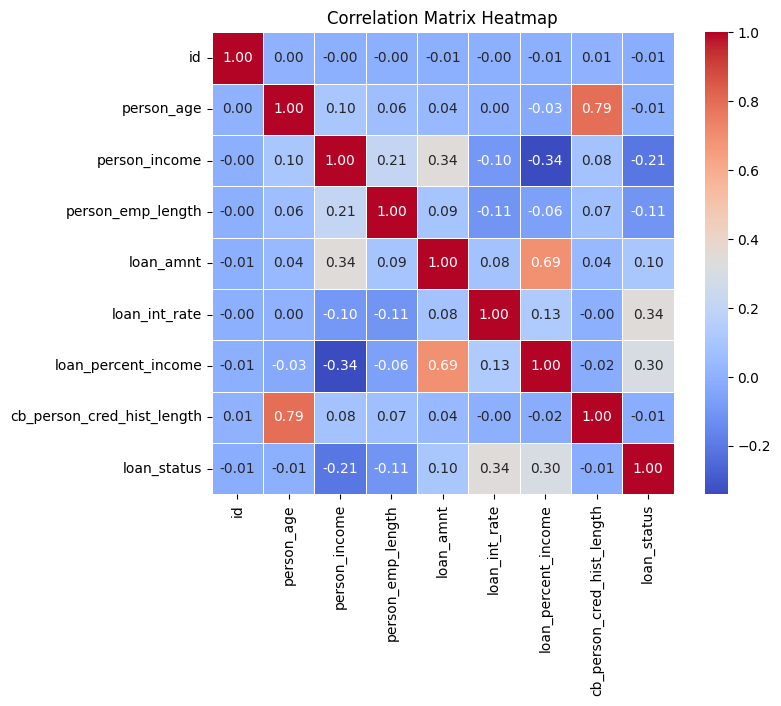

In [ ]:
target = 'loan_status'
# Calculate the correlation matrix
correlation_matrix = data[numeric_cols_names].corr()

correlation_with_target = correlation_matrix[target].abs().sort_values(ascending=False)

# Display features with correlation with the target
print(correlation_with_target)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

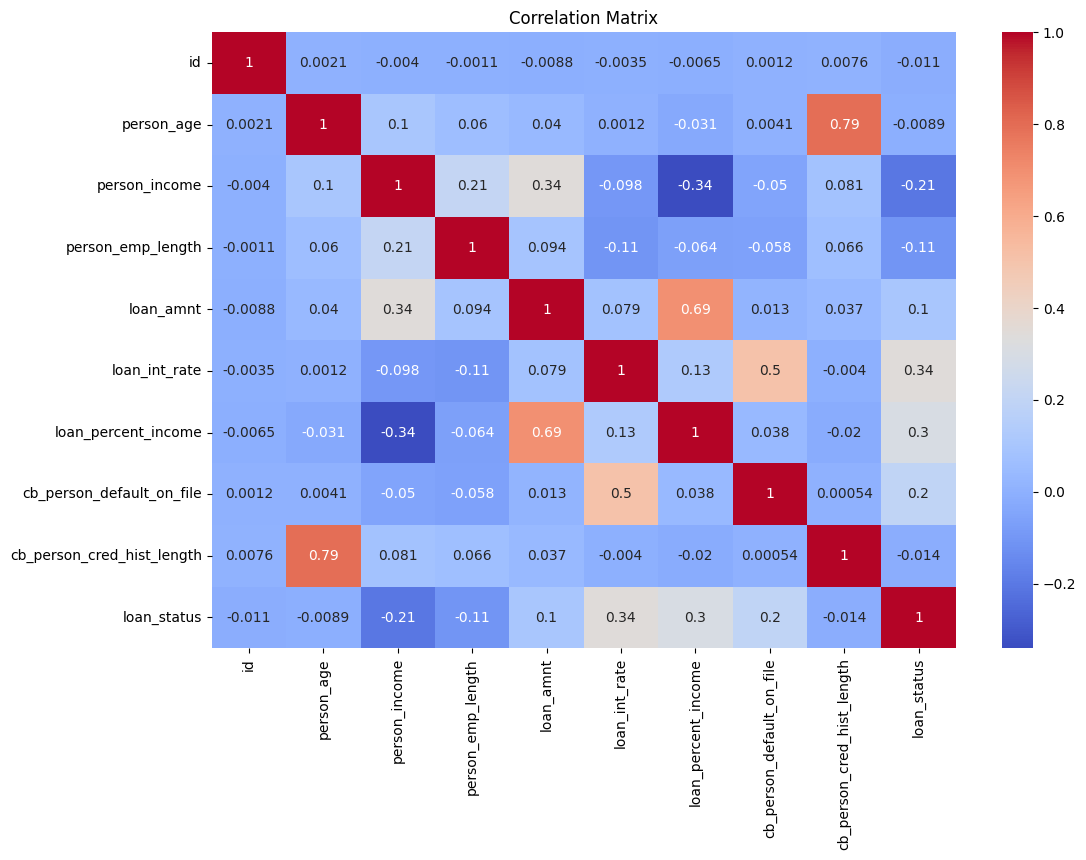

person_age                       int64
person_income                    int64
person_emp_length              float64
loan_amnt                        int64
loan_int_rate                  float64
loan_percent_income            float64
cb_person_default_on_file        int64
cb_person_cred_hist_length       int64
person_home_ownership_OTHER       bool
person_home_ownership_OWN         bool
person_home_ownership_RENT        bool
loan_intent_EDUCATION             bool
loan_intent_HOMEIMPROVEMENT       bool
loan_intent_MEDICAL               bool
loan_intent_PERSONAL              bool
loan_intent_VENTURE               bool
loan_grade_B                      bool
loan_grade_C                      bool
loan_grade_D                      bool
loan_grade_E                      bool
loan_grade_F                      bool
loan_grade_G                      bool
dtype: object
Selected features: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent

In [ ]:
# Correlation matrix with numeric columns only
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Define features (X) and target (y) with only numeric columns in X
X = data.drop(columns=['id', 'loan_status'])
y = data['loan_status']

# Ensure all columns in X are numeric
print(X.dtypes)

# Apply RFE for feature selection
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=15, step=1)
rfe_selector.fit(X, y)
selected_features = X.columns[rfe_selector.support_]
print("Selected features:", selected_features)

# Filter X to include only selected features
X = X[selected_features]


# **Step 6: Splitting the Data and Scaling**

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Step 7: Define and Evaluate Models (LightGBM and XGBoost)**

In [ ]:
def evaluate_model(model, params):
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, params, scoring='roc_auc', cv=5, n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_score_

# LightGBM model and hyperparameters
lgbm_model = LGBMClassifier()
lgbm_params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [-1, 3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Evaluate the LightGBM model
best_lgbm, lgbm_best_score = evaluate_model(lgbm_model, lgbm_params)
print(f"LightGBM - Best ROC-AUC: {lgbm_best_score:.4f}")

# XGBoost model and hyperparameters
xgb_model = XGBClassifier()
xgb_params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Evaluate the XGBoost model
best_xgb, xgb_best_score = evaluate_model(xgb_model, xgb_params)
print(f"XGBoost - Best ROC-AUC: {xgb_best_score:.4f}")


[LightGBM] [Info] Number of positive: 4693, number of negative: 31852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 36545, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128417 -> initscore=-1.915028
[LightGBM] [Info] Start training from score -1.915028
LightGBM - Best ROC-AUC: 0.9460
XGBoost - Best ROC-AUC: 0.9431


# **Step 8: Final Model Evaluation on Test Set**

In [ ]:
# Evaluate LightGBM on test set
y_pred_lgbm = best_lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Test Accuracy: {lgbm_accuracy:.4f}")
print(classification_report(y_test, y_pred_lgbm))

# Evaluate XGBoost on test set
y_pred_xgb = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, y_pred_xgb))


LightGBM Test Accuracy: 0.9475
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10610
           1       0.90      0.67      0.77      1572

    accuracy                           0.95     12182
   macro avg       0.93      0.83      0.87     12182
weighted avg       0.95      0.95      0.94     12182

XGBoost Test Accuracy: 0.9483
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10610
           1       0.89      0.68      0.77      1572

    accuracy                           0.95     12182
   macro avg       0.92      0.83      0.87     12182
weighted avg       0.95      0.95      0.95     12182



In [ ]:
# Load the test data
test_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/Loan_test.csv')

# Drop the 'id' column to get features for prediction
X_test = test_data.drop(columns='id')

# Apply Label Encoding to binary categorical variables
X_test['cb_person_default_on_file'] = label_encoder.transform(X_test['cb_person_default_on_file'])

# Apply One-Hot Encoding to other categorical variables
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure test data has the same columns as the training set (selected features)
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with 0 values

X_test = X_test[selected_features]

# Scale the test data
X_test = scaler.transform(X_test)

# Generate loan status predictions (probabilities for loan_status)
predictions = best_xgb.predict_proba(X_test)[:, 1]  # Probability of positive class

# Create the submission DataFrame with the boolean column
submission = pd.DataFrame({
    'id': test_data['id'],                        # Test set IDs
    'loan_status': predictions,                   # Probability of positive class
    'loan_status_bool': predictions > 0.5         # Boolean column based on threshold 0.5
})

# Save submission file to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")


Submission file created successfully.
